In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
path = "F:/for learn/Python_MachineLearning/"
colnames = ["Class label",
            "Alcohol", 
            "Malic acid", 
            "Ash", 
            "Alcalinity of ash", 
            "Magnesium", 
            "Total phenols",
            "Flavanoids",
            "Nonflavanoid phenols",
            "Proanthocyanins",
            "Color intensity",
            "Hue",
            "OD280/OD315 of diluted wines",
            "Proline"]
df_wine = pd.read_csv(path + "wine.data", header=None, names=colnames)

In [4]:
# 只选取两类
dat = df_wine[df_wine["Class label"] > 1]
X = dat[["Alcohol", "Hue"]].values
y = dat["Class label"].values

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# 比较无剪枝树与Bagging， adaboost方法的准确率与决策区域
tree = DecisionTreeClassifier(max_depth=None, criterion="entropy")
## max_samples 和 max_features 可以是 int 或 float
## 当为 int时，表示抽样个数
## 当为 float时，表示抽样比例，即抽样个数 = max_samples(max_features) * total_sample(feature)_num
bag = BaggingClassifier(base_estimator=tree, 
                        n_estimators=500, 
                        max_features=1.0,
                        max_samples=1.0,
                        bootstrap=True, 
                        bootstrap_features=False,
                        n_jobs=-1, 
                        random_state=0)
ada = AdaBoostClassifier(base_estimator=tree, 
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0)

In [6]:
# 准确率比较
models = [tree, bag, ada]
names = ["Decision Tree", "Bagging", "adaboost"]
for name, model in zip(names, models):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
    print("%s train/test acc: %0.3f/%0.3f" % (name, acc_train, acc_test))

Decision Tree train/test acc: 1.000/0.861
Bagging train/test acc: 1.000/0.889
adaboost train/test acc: 1.000/0.861


In [7]:
# 决策区域比较
x_min = X[:, 0].min() - 1.0
x_max = X[:, 0].max() + 1.0
y_min = X[:, 1].min() - 1.0
y_max = X[:, 1].max() + 1.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1))

In [12]:
figs, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12, 6))
colors = ["blue", "red"]
markers = ["o", "x"]
y_labels = np.unique(y)

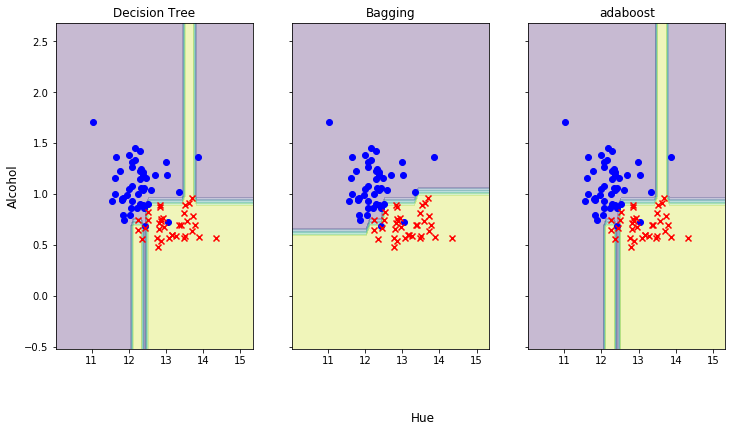

In [13]:
for idx, label, clf in zip([0, 1, 2], names, models):
    clf.fit(X_train, y_train)
    z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
    axes[idx].contourf(xx, yy, z, alpha=0.3)
    for index, cl in enumerate(y_labels):
        axes[idx].scatter(x=X_train[y_train == cl, 0],
                          y=X_train[y_train == cl, 1],
                          c=colors[index],
                          marker=markers[index])
    axes[idx].set_title(label)

axes[0].set_ylabel('Alcohol', fontsize=12)
plt.text(7.2, -1.2, s="Hue", ha="center", va="center", fontsize=12)
plt.show()